In [90]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf



flows = pd.read_csv("london_flows.csv")

In [91]:
flows.head(10)


,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [92]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error


flows = pd.read_csv("london_flows.csv")
print(flows.info())
print(flows.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB
None
  station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37  

In [93]:
import pandas as pd




cdatasubmat = flows.pivot_table(index='station_origin', columns='station_destination', values='flows', aggfunc='sum')


cdatasubmat.fillna(0, inplace=True)


cdatasubmat['All'] = cdatasubmat.sum(axis=1)
cdatasubmat.loc['All'] = cdatasubmat.sum()

cdatasubmat



station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745.0
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886.0
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868.0
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [94]:
flows['log_dest_jobs'] = np.log(flows['jobs'] + 0.001)

prodsim_formula_exp = 'flows ~ station_origin + log_dest_jobs + distance -1' 

prodsim = smf.glm(formula = prodsim_formula_exp, data=flows, family=sm.families.Poisson()).fit()
print(prodsim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2195e+05
Date:                Fri, 06 Sep 2024   Deviance:                   1.6717e+06
Time:                        10:05:12   Pearson chi2:                 2.42e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [95]:
O_i = pd.DataFrame(flows.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
flows = flows.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
flows = flows.merge(D_j, on = "station_destination", how = "left" )

/tmp/ipykernel_38272/3741157495.py:1: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  O_i = pd.DataFrame(flows.groupby(["station_origin"])["flows"].agg(np.sum))
/tmp/ipykernel_38272/3741157495.py:5: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  D_j = pd.DataFrame(flows.groupby(["station_destination"])["flows"].agg(np.sum))


In [96]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodsim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
#then once you have done this you can join them back into the dataframes
flows = flows.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
flows.drop(columns = ["coef"], inplace = True)


In [97]:
flows.head()

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022


In [98]:
alpha_i = prodsim.params[0:399]
gamma = prodsim.params[399]
beta = -prodsim.params[400]

/tmp/ipykernel_38272/4239489167.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodsim.params[399]
/tmp/ipykernel_38272/4239489167.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -prodsim.params[400]


In [99]:
alpha_i

station_origin[Abbey Road]         -2.881022
station_origin[Acton Central]      -1.147704
station_origin[Acton Town]         -1.600213
station_origin[Aldgate]            -2.912650
station_origin[Aldgate East]       -2.824608
                                      ...   
station_origin[Wood Street]        -0.927397
station_origin[Woodford]           -0.628676
station_origin[Woodgrange Park]    -0.881062
station_origin[Woodside Park]      -1.145098
station_origin[Woolwich Arsenal]    0.535720
Length: 399, dtype: float64

In [100]:
gamma

0.7509085100790093

In [101]:
beta

0.00015081738474255965

In [102]:
flows["prodsimest3"] = np.exp(flows["alpha_i"]+gamma*flows["log_dest_jobs"] 
                                 - beta*flows["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest3
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,77.979903
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,1.506097
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.180041
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.274167
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,55.954205
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.218713
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,4.966668
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.232938
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.316400
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,3.815783


In [103]:
#first round the estimates
flows["prodsimest3"] = round(flows["prodsimest3"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
matrix1 = flows.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
matrix1

/tmp/ipykernel_38272/3044686306.py:4: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix1 = flows.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/3044686306.py:4: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix1 = flows.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/3044686306.py:4: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3745.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,31.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3099.0


In [104]:
# define r^2 and RMSE calculations
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(np.sqrt(res.mean()), 3)
    
    return RMSE

In [105]:
CalcRSquared(flows["flows"], flows["prodsimest3"])

0.448275961647526

In [106]:
CalcRMSE(flows["flows"], flows["prodsimest3"])

97.845

第二题

In [107]:
# define new jobs column
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2 * row['jobs']
    else:
        val = row["jobs"]
    return val
        
flows["Jobs_ScenarioA"] = flows.apply(new_job, axis =1)
flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest3,Jobs_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,4.0,611.0


In [108]:

# Assuming 'flows' is your DataFrame and 'gamma' and 'beta' are defined somewhere in your script
Dj2_gamma = flows["Jobs_ScenarioA"]**gamma
dist_beta = np.exp(flows['distance']*(-beta))

# Calculate the first stage of the Ai values
flows["Ai1"] = Dj2_gamma * dist_beta

# Sum over all js to compute Ai values
A_i = flows.groupby(["station_origin"])["Ai1"].agg(np.sum).reset_index()

# Now divide into 1 to calculate Ai
A_i["Ai1"] = 1 / A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)

# Merge the A_i values back into the flows DataFrame
flows = flows.merge(A_i[['station_origin', 'A_i2']], on="station_origin", how="left")


/tmp/ipykernel_38272/4172959715.py:9: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = flows.groupby(["station_origin"])["Ai1"].agg(np.sum).reset_index()


In [109]:
flows["prodsimest2"] = flows["A_i2"]*flows["O_i"]*Dj2_gamma*dist_beta
#round
flows["prodsimest2"] = round(flows["prodsimest2"])
#check
flows[["prodsimest3", "prodsimest2"]]

,prodsimest3,prodsimest2
0,78.0,84.0
1,2.0,2.0
2,4.0,4.0
3,99.0,63.0
4,56.0,60.0
...,...,...
61469,100.0,108.0
61470,296.0,320.0
61471,36.0,39.0
61472,125.0,135.0


In [110]:
#Matrix View (Code Taken from Practical 3)
matrix2 = flows.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
matrix2

/tmp/ipykernel_38272/4144618607.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix2 = flows.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/4144618607.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix2 = flows.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/4144618607.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,602.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,14.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2880.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,20.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3098.0


In [111]:
# beta change
beta_b1 = beta*1.3
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = flows["jobs"]**gamma
dist_decay_b1 = np.exp(flows['distance']*(-beta_b1))
#calcualte the first stage of the Ai values
flows["alpha_i_partial_b1"] = Dj2_gamma * dist_decay_b1
#now do the sum over all js bit
A_i_b1 = pd.DataFrame(flows.groupby(["station_origin"])["alpha_i_partial_b1"].sum())
#now divide into 1
A_i_b1["alpha_i_partial_b1"] = 1/A_i_b1["alpha_i_partial_b1"]
A_i_b1.rename(columns={"alpha_i_partial_b1":"alpha_i_sec_b1"}, inplace=True)
#and write the A_i values back into the flowsframe
flows = flows.merge(A_i_b1[["alpha_i_sec_b1"]], left_on="station_origin", right_index=True, how="left")

In [112]:
beta_b2 = beta*1.6
dist_decay_b2 = np.exp(flows['distance']*(-beta_b2))
flows["alpha_i_partial_b2"] = Dj2_gamma * dist_decay_b2
A_i_b2 = pd.DataFrame(flows.groupby(["station_origin"])["alpha_i_partial_b2"].sum())
A_i_b2["alpha_i_partial_b2"] = 1/A_i_b2["alpha_i_partial_b2"]
A_i_b2.rename(columns={"alpha_i_partial_b2":"alpha_i_sec_b2"}, inplace=True)
flows = flows.merge(A_i_b2[["alpha_i_sec_b2"]], left_on="station_origin", right_index=True, how="left")

In [113]:
#Calculate new flows for scenario b1
flows["flows_scenario_b1"] = np.round(flows["alpha_i_sec_b1"]*flows["population"]*Dj2_gamma*dist_decay_b1)

#Calculate new flows for scenario b2
flows["flows_scenario_b2"] = np.round(flows["alpha_i_sec_b2"]*flows["population"]*Dj2_gamma*dist_decay_b2)

flows.head(50)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,...,Jobs_ScenarioA,Ai1,A_i2,prodsimest2,alpha_i_partial_b1,alpha_i_sec_b1,alpha_i_partial_b2,alpha_i_sec_b2,flows_scenario_b1,flows_scenario_b2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,...,78549.0,1390.576011,0.000100,84.0,962.525666,0.000111,666.238775,0.000129,64.0,51.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,...,442.0,26.857420,0.000100,2.0,18.274375,0.000111,12.434284,0.000129,1.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,...,665.0,74.540461,0.000100,4.0,62.835555,0.000111,52.968642,0.000129,4.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,...,29386.0,1051.967464,0.000100,63.0,1406.369936,0.000111,1117.251263,0.000129,93.0,86.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,...,15428.0,997.802881,0.000100,60.0,902.083993,0.000111,815.547384,0.000129,60.0,63.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,...,1208.0,75.230123,0.000100,5.0,55.590965,0.000111,41.078697,0.000129,4.0,3.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,...,845.0,88.567990,0.000100,5.0,74.493665,0.000111,62.655889,0.000129,5.0,5.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,...,1748.0,75.483796,0.000100,5.0,51.375288,0.000111,34.966713,0.000129,3.0,3.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,...,850.0,59.139626,0.000100,4.0,44.007274,0.000111,32.746913,0.000129,3.0,3.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,...,611.0,68.044833,0.000100,4.0,56.887269,0.000111,47.559252,0.000129,4.0,4.0


In [114]:
#Matrix View (Code Taken from Practical 3)
matrix3 = flows.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
matrix3

/tmp/ipykernel_38272/3185477014.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix3 = flows.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/3185477014.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix3 = flows.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/3185477014.py:2: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,10.0,9.0,NaN,17.0,0.0,NaN,13.0,...,11.0,3.0,1.0,24.0,NaN,0.0,NaN,0.0,NaN,3739.0
Aldgate,NaN,NaN,1.0,NaN,43.0,NaN,NaN,0.0,NaN,29.0,...,1.0,NaN,2.0,1.0,NaN,0.0,NaN,0.0,NaN,2877.0
Aldgate East,NaN,NaN,1.0,46.0,NaN,NaN,0.0,0.0,NaN,30.0,...,1.0,0.0,2.0,2.0,NaN,1.0,NaN,0.0,NaN,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,39.0,52.0,NaN,NaN,NaN,NaN,26.0,...,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4865.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,1.0,17.0,17.0,NaN,0.0,NaN,NaN,32.0,...,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [115]:
matrix4 = flows.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
matrix4

/tmp/ipykernel_38272/2702212816.py:1: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix4 = flows.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/2702212816.py:1: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  matrix4 = flows.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_38272/2702212816.py:1: FutureWarning: The provided callable <function sum at 0x7f0b841de700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,7.0,7.0,NaN,21.0,0.0,NaN,10.0,...,8.0,2.0,1.0,27.0,NaN,0.0,NaN,0.0,NaN,3742.0
Aldgate,NaN,NaN,0.0,NaN,48.0,NaN,NaN,0.0,NaN,30.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2878.0
Aldgate East,NaN,NaN,0.0,52.0,NaN,NaN,0.0,0.0,NaN,31.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,34.0,49.0,NaN,NaN,NaN,NaN,21.0,...,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4856.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,1.0,15.0,14.0,NaN,0.0,NaN,NaN,32.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [116]:
import numpy as np

# Combine filling NaNs with 0 and converting to numpy arrays in one step
matrix1_array = np.array(matrix1.fillna(0))
matrix2_array = np.array(matrix2.fillna(0))
matrix3_array = np.array(matrix3.fillna(0))
matrix4_array = np.array(matrix4.fillna(0))


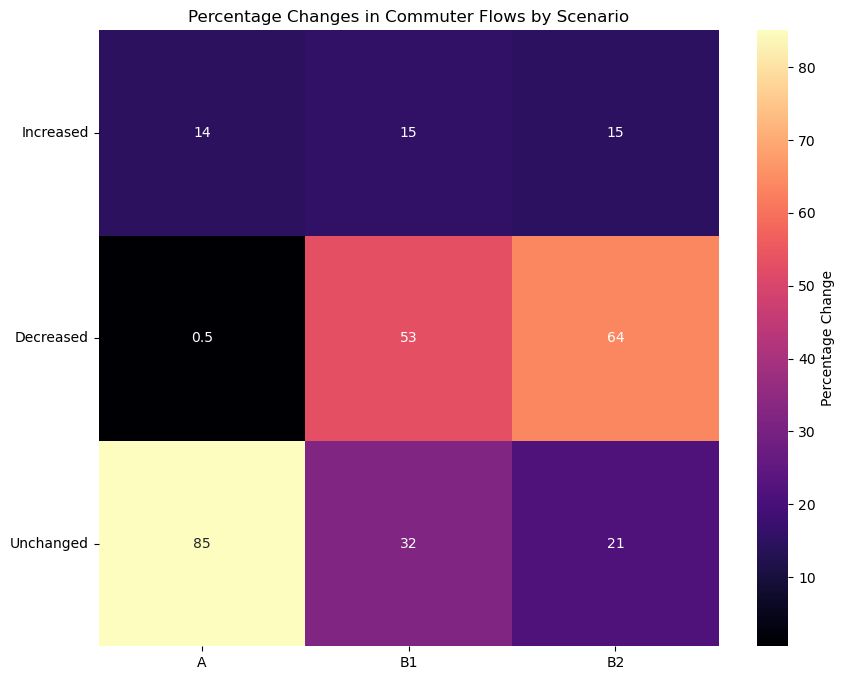

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_scenarios(scenario_matrix, prod_matrix):
    scenario_matrix = np.array(scenario_matrix)
    prod_matrix = np.array(prod_matrix)
    scenario_matrix = scenario_matrix[:-1, :-1]
    prod_matrix = prod_matrix[:-1, :-1]
    diff_matrix = scenario_matrix - prod_matrix
    increased_sites = np.sum(diff_matrix > 0)
    decreased_sites = np.sum(diff_matrix < 0)
    unchanged_sites = np.sum(diff_matrix == 0)
    total_sites = increased_sites + decreased_sites + unchanged_sites
    increased_percentage = increased_sites / total_sites * 100
    decreased_percentage = decreased_sites / total_sites * 100
    unchanged_percentage = unchanged_sites / total_sites * 100
    return increased_percentage, decreased_percentage, unchanged_percentage

# Assume matrix1, matrix2, matrix3, matrix4 are defined as your data matrices
increased_A, decreased_A, unchanged_A = compare_scenarios(matrix2, matrix1)
increased_B1, decreased_B1, unchanged_B1 = compare_scenarios(matrix3, matrix1)
increased_B2, decreased_B2, unchanged_B2 = compare_scenarios(matrix4, matrix1)

scenarios = ['A', 'B1', 'B2']
increased_percentages = [increased_A, increased_B1, increased_B2]
decreased_percentages = [decreased_A, decreased_B1, decreased_B2]
unchanged_percentages = [unchanged_A, unchanged_B1, unchanged_B2]

# Create a matrix for the heatmap
change_matrix = np.array([increased_percentages, decreased_percentages, unchanged_percentages])

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(change_matrix, annot=True, cmap='magma', cbar_kws={'label': 'Percentage Change'}, ax=ax)
ax.set_xticklabels(scenarios)
ax.set_yticklabels(['Increased', 'Decreased', 'Unchanged'], rotation=0)
ax.set_title('Percentage Changes in Commuter Flows by Scenario')
plt.show()


In [118]:
def calculate_changes(scenario_matrix, prod_matrix):
  
    scenario_matrix = np.array(scenario_matrix)
    prod_matrix = np.array(prod_matrix)
    
    
    diff_matrix = scenario_matrix - prod_matrix
    
    return diff_matrix


scenario_changes = [
    calculate_changes(matrix2, matrix1), 
    calculate_changes(matrix3, matrix1), 
    calculate_changes(matrix4, matrix1)
]


scenarios = ['Scenario A', 'Scenario B1', 'Scenario B2']
for i, scenario in enumerate(scenarios):
    changes = np.abs(scenario_changes[i])  
    average_change = np.nanmean(changes)  
    total_change = np.nansum(changes)     

    print(f"{scenario}:")
    print(f"Average absolute change: {average_change:.2f}")
    print(f"Total absolute change: {total_change:.2f}")
    print()

Scenario A:
Average absolute change: 1.20
Total absolute change: 74612.00

Scenario B1:
Average absolute change: 4.22
Total absolute change: 262944.00

Scenario B2:
Average absolute change: 8.54
Total absolute change: 531898.00

